Line numbers for spectra headers are: 525nm : 4893, 308nm : 9769, 450nm : 14645, Spectrum Max Plot : 17

First need to load the file into python

In [2]:
from pathlib import Path
import numpy as np

input_file = Path.cwd() / "20220118-PCD-Ristretto-CAP1-1-Rep1.asc"

f = input_file.open()
lines = f.readlines()

for idx, ele in enumerate(lines):
    lines[idx] = ele.strip('\n')

The above has loaded the files contents into a list and stripped the newline char.

Now to search for the indexes

In [3]:
matches = [match for match, s in enumerate(lines) if "Spectrum Max Plot" in s]

matches2 = [match for match, s in enumerate(lines) if "nm" in s]

matches = matches + matches2

print(matches)


[16, 4892, 9768, 14644]


In [22]:
dict_list = []

for idx, val in enumerate(matches):
    if idx + 1 < len(matches):
        dict_list.append({ lines[val] : lines[val+1 : matches[idx+1]] })

    if idx + 1 == len(matches):
        dict_list.append({ lines[val] : lines[val+1:]})    
        
## storing the data as a list of dicts

    

In [5]:
data_list = []
column_list = []

for idx, val in enumerate(matches):
    if idx + 1 < len(matches):
        data_list.append(lines[val+1 : matches[idx+1]])
        
        column_list.append(lines[val])

    if idx + 1 == len(matches):
        data_list.append(lines[val+1:])    
        column_list.append(lines[val])

    print(column_list[idx])

## storing the data as a list of lists

Spectrum Max Plot
1: 525 nm, 2 nm
2: 308 nm, 2 nm
Detector A-450 nm


The above code is generalised enough for any number of spectra in the file.

Now to load the dicts into a DF.

In [24]:
import pandas as pd

df_list = []

for data_dict in dict_list: ## a work around as pandas wasnt reading the list of dicts properly.
    df_list.append(pd.DataFrame(data_dict)) 

df = pd.concat(df_list)

df = df.apply(pd.to_numeric)  ## converts all the data to numeric as readlines() reads everything as string. 

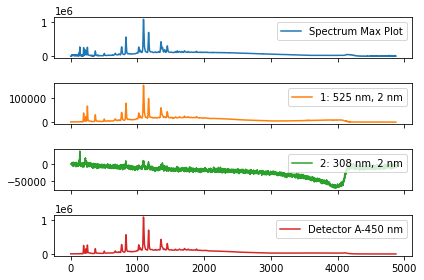

In [25]:
import matplotlib.pyplot as plt

df.plot(subplots=True)

plt.tight_layout()
plt.show()